In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

import os


INPUT_DIR = "input/UD_English-EWT"
INTERMEDIATE_DIR = "intermediate"

## Dataset

In [2]:
from tasks import preprocessing

In [3]:
print("Loading training dataset...")
train_df = preprocessing.conllu_to_pd(os.path.join(INPUT_DIR, "en_ewt-ud-train.conllu"))
print("Loading validation dataset...")
val_df = preprocessing.conllu_to_pd(os.path.join(INPUT_DIR, "en_ewt-ud-dev.conllu"))
print("Loading test dataset...")
test_df = preprocessing.conllu_to_pd(os.path.join(INPUT_DIR, "en_ewt-ud-test.conllu"))

print(f"Training data shape: {train_df.shape}\nValidation data shape: {val_df.shape}\nTest data shape: {test_df.shape}")

Loading training dataset...
	Reading data...
	Parsing data...
	Getting words...


  0%|          | 0/12544 [00:00<?, ?it/s]

	Getting POS tags...


  0%|          | 0/12544 [00:00<?, ?it/s]

	Getting Sentence ids...


  0%|          | 0/12544 [00:00<?, ?it/s]

Loading validation dataset...
	Reading data...
	Parsing data...
	Getting words...


  0%|          | 0/2001 [00:00<?, ?it/s]

	Getting POS tags...


  0%|          | 0/2001 [00:00<?, ?it/s]

	Getting Sentence ids...


  0%|          | 0/2001 [00:00<?, ?it/s]

Loading test dataset...
	Reading data...
	Parsing data...
	Getting words...


  0%|          | 0/2077 [00:00<?, ?it/s]

	Getting POS tags...


  0%|          | 0/2077 [00:00<?, ?it/s]

	Getting Sentence ids...


  0%|          | 0/2077 [00:00<?, ?it/s]

Training data shape: (207227, 3)
Validation data shape: (25511, 3)
Test data shape: (25450, 3)


In [4]:
train_df

,words,pos,sent_id
0,al,PROPN,weblog-juancole.com_juancole_20051126063000_EN...
1,-,PUNCT,weblog-juancole.com_juancole_20051126063000_EN...
2,zaman,PROPN,weblog-juancole.com_juancole_20051126063000_EN...
3,:,PUNCT,weblog-juancole.com_juancole_20051126063000_EN...
4,american,ADJ,weblog-juancole.com_juancole_20051126063000_EN...
...,...,...,...
207222,on,ADP,reviews-319816-0029
207223,my,PRON,reviews-319816-0029
207224,car,NOUN,reviews-319816-0029
207225,),PUNCT,reviews-319816-0029


### Statistics

In [5]:
def length_sentences(df: pd.DataFrame) -> float:
    lengths = df.groupby(["sent_id"]).agg(lambda x: len(x))
    return lengths.words

train_length = length_sentences(train_df)
val_length = length_sentences(val_df)
test_length = length_sentences(test_df)

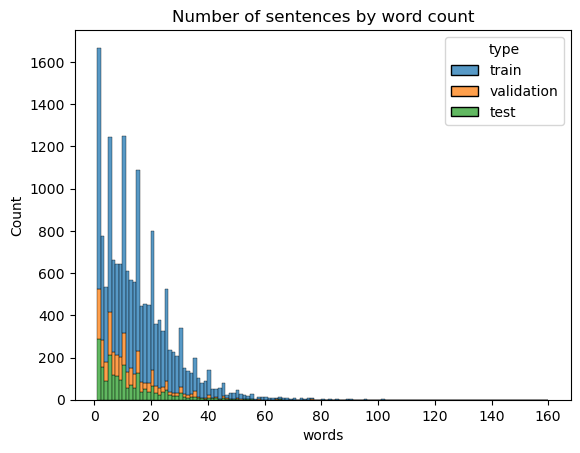

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


stats_df = pd.DataFrame({"words": pd.concat([train_length, val_length, test_length], ignore_index=True),
                        "type": len(train_length)*["train"] +
                         len(val_length)*["validation"] + 
                         len(test_length)*["test"]})

sns.histplot(x="words", 
             hue="type", 
             data=stats_df, 
             multiple="stack")

plt.title("Number of sentences by word count")
plt.show()

In [7]:
train_length.describe()

count    12544.000000
mean        16.520010
std         12.551839
min          1.000000
25%          7.000000
50%         14.000000
75%         23.000000
max        160.000000
Name: words, dtype: float64

In [8]:
val_length.describe()

count    2001.000000
mean       12.749125
std        10.564707
min         1.000000
25%         5.000000
50%        10.000000
75%        17.000000
max        77.000000
Name: words, dtype: float64

In [9]:
test_length.describe()

count    2077.00000
mean       12.25325
std        10.74451
min         1.00000
25%         4.00000
50%         9.00000
75%        17.00000
max        84.00000
Name: words, dtype: float64

In [10]:
print(f"Vocabulary size: {len(set(train_df.words))}")

Vocabulary size: 17113


In [11]:
print(f"Total word count:\nTraining: {train_df.shape[0]}"
      f"\nValidation: {val_df.shape[0]}"
      f"\nTesting: {test_df.shape[0]}")

Total word count:
Training: 207227
Validation: 25511
Testing: 25450


In [12]:
print(f"Total sentence count:\nTraining: {len(set(train_df.sent_id))}"
      f"\nValidation: {len(set(val_df.sent_id))}"
      f"\nTesting: {len(set(test_df.sent_id))}")

Total sentence count:
Training: 12544
Validation: 2001
Testing: 2077


### Stats-driven preprocessing

In [13]:
def exclude_small_sentences(conllu_df: pd.DataFrame, min_len: int) -> pd.DataFrame:
    assert 1 <= min_len

    length_df = length_sentences(conllu_df)
    valid_length_df = length_df[length_df >= min_len]
    valid_ids = set(valid_length_df.index)
    return conllu_df[conllu_df.sent_id.isin(valid_ids)]

In [14]:
MIN_SENTENCE_LENGTH = 5

train_df_filt = exclude_small_sentences(train_df, MIN_SENTENCE_LENGTH)
val_df_filt = exclude_small_sentences(val_df, MIN_SENTENCE_LENGTH)
test_df_filt = exclude_small_sentences(test_df, MIN_SENTENCE_LENGTH)

train_df_filt

,words,pos,sent_id
0,al,PROPN,weblog-juancole.com_juancole_20051126063000_EN...
1,-,PUNCT,weblog-juancole.com_juancole_20051126063000_EN...
2,zaman,PROPN,weblog-juancole.com_juancole_20051126063000_EN...
3,:,PUNCT,weblog-juancole.com_juancole_20051126063000_EN...
4,american,ADJ,weblog-juancole.com_juancole_20051126063000_EN...
...,...,...,...
207222,on,ADP,reviews-319816-0029
207223,my,PRON,reviews-319816-0029
207224,car,NOUN,reviews-319816-0029
207225,),PUNCT,reviews-319816-0029


### Creating window embeddings

In [15]:
print("Downloading Word2Vec model...")

In [16]:
%%capture
!python -m spacy download en_core_web_md

In [17]:
print("Model downloaded.")

Model downloaded.


In [18]:
import spacy


print("Loading Word2Vec model...")
word2vec = spacy.load('en_core_web_md')
print("Model loaded.")

Loading Word2Vec model...
Model loaded.


In [19]:
import pickle


def save_global_state():
    np.save(os.path.join(INTERMEDIATE_DIR, "x_train.npy"), x_train)
    np.save(os.path.join(INTERMEDIATE_DIR, "x_valid.npy"), x_valid)
    np.save(os.path.join(INTERMEDIATE_DIR, "x_test.npy"), x_test)

    with open(os.path.join(INTERMEDIATE_DIR, "y_train.obj"), "wb") as file:
        pickle.dump(y_train, file)
    with open(os.path.join(INTERMEDIATE_DIR, "y_valid.obj"), "wb") as file:
        pickle.dump(y_valid, file)
    with open(os.path.join(INTERMEDIATE_DIR, "y_test.obj"), "wb") as file:
        pickle.dump(y_test, file)


def load_global_state():
    x_train = np.load(os.path.join(INTERMEDIATE_DIR, "x_train.npy"))
    x_valid = np.load(os.path.join(INTERMEDIATE_DIR, "x_valid.npy"))
    x_test = np.load(os.path.join(INTERMEDIATE_DIR, "x_test.npy"))

    with open(os.path.join(INTERMEDIATE_DIR, "y_train.obj"), "rb") as file:
        y_train = pickle.load(file)
    with open(os.path.join(INTERMEDIATE_DIR, "y_valid.obj"), "rb") as file:
        y_valid = pickle.load(file)
    with open(os.path.join(INTERMEDIATE_DIR, "y_test.obj"), "rb") as file:
        y_test = pickle.load(file)

    return x_train, x_valid, x_test, y_train, y_valid, y_test

In [20]:
try:
    print("Attempting to load intermediate calculations...")
    x_train, x_valid, x_test, y_train, y_valid, y_test = load_global_state()
except FileNotFoundError:
    print("No intermediate files present, calculating from scratch.")
    WINDOW_SIZE = 5

    print("Processing training dataset...")
    x_train, y_train = preprocessing.preprocess(
                            train_df_filt, WINDOW_SIZE, 65000, word2vec)
    
    print("Processing validation dataset...")
    x_valid, y_valid = preprocessing.preprocess(
                            val_df_filt, WINDOW_SIZE, 25000, word2vec)
    
    print("Processing test dataset...")
    x_test, y_test = preprocessing.preprocess(
                            test_df_filt, WINDOW_SIZE, 10000, word2vec)
    save_global_state()
    

x_train.shape, x_valid.shape, x_test.shape, len(y_train), len(y_valid), len(y_test)

Attempting to load intermediate calculations...


((1500, 65000), (1500, 24385), (1500, 10000), 65000, 24385, 10000)

## Classifiers

In [21]:
from tasks.models import BaselineLabelClassifier

base_cls = BaselineLabelClassifier()
base_cls.fit(X=train_df_filt.words, y=train_df_filt.pos)

BaselineLabelClassifier()

In [22]:
from sklearn.metrics import classification_report

training_preds = base_cls.predict(train_df_filt.words)
print(classification_report(train_df_filt.pos, training_preds))

              precision    recall  f1-score   support

         ADJ       0.88      0.89      0.89     12858
         ADP       0.88      0.67      0.76     17732
         ADV       0.61      0.83      0.70      9996
         AUX       0.88      0.78      0.83     12760
       CCONJ       0.98      0.99      0.99      6656
         DET       0.96      0.95      0.95     16228
        INTJ       0.64      0.86      0.74       572
        NOUN       0.88      0.89      0.89     34014
         NUM       0.99      0.88      0.93      3754
        PART       0.71      0.89      0.79      5739
        PRON       0.90      0.95      0.92     18495
       PROPN       0.89      0.83      0.86     11291
       PUNCT       0.99      0.99      0.99     22586
       SCONJ       0.64      0.41      0.50      3836
         SYM       0.89      0.83      0.86       668
        VERB       0.83      0.89      0.86     22373
           X       0.82      0.58      0.68       405
           _       0.97    

In [23]:
test_preds = base_cls.predict(test_df_filt.words)
print(classification_report(test_df_filt.pos, test_preds))

              precision    recall  f1-score   support

         ADJ       0.88      0.82      0.85      1670
         ADP       0.89      0.67      0.76      2013
         ADV       0.62      0.83      0.71      1132
         AUX       0.89      0.78      0.83      1528
       CCONJ       0.99      0.98      0.99       726
         DET       0.96      0.95      0.96      1871
        INTJ       0.66      0.73      0.69        86
        NOUN       0.66      0.89      0.76      3911
         NUM       0.96      0.55      0.70       485
        PART       0.70      0.89      0.78       637
        PRON       0.91      0.95      0.93      2123
       PROPN       0.88      0.47      0.62      1754
       PUNCT       0.99      0.98      0.99      2799
       SCONJ       0.60      0.44      0.51       382
         SYM       0.82      0.86      0.84       101
        VERB       0.80      0.82      0.81      2549
           X       0.00      0.00      0.00        80
           _       0.96    

## MLP Classifier

In [44]:
from sklearn.preprocessing import LabelBinarizer


lb = LabelBinarizer()
y_train_vec = lb.fit_transform(y_train)
y_valid_vec = lb.transform(y_valid)
y_test_vec = lb.transform(y_test)

y_train_vec.shape, y_valid_vec.shape, y_test_vec.shape

((65000, 18), (24385, 18), (10000, 18))

In [45]:
x_train = x_train.T
x_valid = x_valid.T
x_test = x_test.T

In [46]:
import time
import os


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [47]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy

In [48]:
gpus = tf.config.list_physical_devices('GPU')
print("Executing with ", gpus[0].name if len(gpus) != 0 else "CPU")

Executing with  /physical_device:GPU:0


In [68]:
def search_mlp_model(hp, input_size: int, output_size: int, min_hid_size: int, max_hid_size: int):
    model = Sequential()

    layer_index = 0
    for i in range(hp.Int(name='num_layers',min_value=1,max_value=4)):
        if layer_index == 0:
            # first layer
            model.add(Dense(hp.Int(name='hidden_units_'+str(i),
                                   min_value=min_hid_size,
                                   max_value=max_hid_size,
                                   step=64),
                            activation="relu",
                            input_dim=input_size
                           ))
            model.add(Dropout(0.5))
        else:
            # subsequent layer
            model.add(Dense(hp.Int(name='hidden_units_'+str(i),
                                   min_value=min_hid_size,
                                   max_value=max_hid_size,
                                   step=64),
                            activation="relu"))
            model.add(Dropout(0.5))

        layer_index += 1

    # Add last layer that produces the logits
    model.add(Dense(output_size,  activation='softmax'))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=hp_learning_rate),
                  metrics=[CategoricalAccuracy()])

    return model

In [69]:
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping


tuner = kt.RandomSearch(lambda x: search_mlp_model(x,
                                                    input_size=x_train.shape[1],
                                                    output_size=y_train_vec.shape[1],
                                                    min_hid_size=128,
                                                    max_hid_size=2048),
                        objective=kt.Objective('val_categorical_accuracy',
                                               direction='max'),
                        max_trials=25,
                        directory='KT_dir',
                        project_name='KT_tuning')

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
hidden_units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 2048, 'step': 64, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001], 'ordered': True}


In [71]:
tuner.search(x_train,
             y_train_vec,
             validation_data=(x_valid, y_valid_vec), 
             epochs=70, 
             batch_size=256,
             callbacks=[early_stopping])

Trial 25 Complete [00h 00m 18s]
val_categorical_accuracy: 0.9117079973220825

Best val_categorical_accuracy So Far: 0.9223703145980835
Total elapsed time: 00h 28m 01s


In [72]:
# Get best hyper-parameters setup
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'hidden_units_0': 1216,
 'learning_rate': 0.0001,
 'hidden_units_1': 960,
 'hidden_units_2': 1984}

In [75]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1216)              1825216   
                                                                 
 dropout (Dropout)           (None, 1216)              0         
                                                                 
 dense_1 (Dense)             (None, 960)               1168320   
                                                                 
 dropout_1 (Dropout)         (None, 960)               0         
                                                                 
 dense_2 (Dense)             (None, 1984)              1906624   
                                                                 
 dropout_2 (Dropout)         (None, 1984)              0         
                                                                 
 dense_3 (Dense)             (None, 18)                3

In [77]:
best_model.save(os.path.join(os.path.join(INTERMEDIATE_DIR, "optimal_model.keras")))